<a href="https://colab.research.google.com/github/MarMarhoun/freelance_work/blob/main/side_projects/NLP_projs/EDA_ArabicText/sa_arabic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project description:

Exploratory Data Analysis of an Arabic text.


> ## Import and process the dataset:

> ### Package installation

In [1]:
!pip install nltk

In [2]:
!pip install ar_wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 8.1 MB/s eta 0:00:00


In [3]:
!pip install pyarabic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
# import the libraries

import string
import re
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Import the dataset

dt_path = "/content/عينة-من-المنشورات-للتحليل-.xlsx"

data= pd.read_excel(dt_path)
#data = pd.read_csv(dt_path)

In [ ]:
data

,تاريخ النشر,المنشور
0,2023-01-27T11:38:06+0000,بلدية ام الفحم مناقصة خارجية 2023/21 الرقم ال...
1,2023-02-28T07:24:18+0000,*بلدية ام الفحم: الشرطة البلدية تخالف سائقَ تر...
2,2023-04-19T15:47:14+0000,*تكريم عمال النظافة في بلدية ام الفحم من قبل م...
3,2023-01-26T12:56:48+0000,*انطلاق مشروع استطلاع الطبيعة الحضرية في مدينة...
4,2023-02-21T07:15:03+0000,*مبروك، استلم جناح تحسين ملامح المدينة في بلدي...
5,2023-02-03T03:39:03+0000,*مركز الطوارئ والخدمات البلدي – نقطة ضوء في عم...
6,2022-01-27T13:09:04+0000,بلدية ام الفحم مناقصة رقم 2022/02 مناقصة لتنفي...
7,2022-03-18T12:04:44+0000,بلدية ام الفحم مناقصة رقم 2022/12 مناقصة لتنفي...
8,2022-08-19T02:20:07+0000,*ضمن اتفاق السقف: في الأيام القريبة المباشرة ب...
9,2022-04-21T01:38:05+0000,*تقديم طلب للجنة الجغرافية – لواء حيفا – لزياد...


In [ ]:
# Display the first row

data['المنشور'][0]

'بلدية ام الفحم  مناقصة خارجية 2023/21 الرقم الديجيتالي 313 تعلن بلدية ام الفحم عن حاجتها لإشغال مدير قسم تطبيق القانون ومواقف السيارات الدرجة والتدريج: 39-37 نسبة الوظيفة: 100% التبعية: مدير جناح (تحسين ملامح المدينة ) مسؤول عن إدارة تخطيط وتشغيل قسم وقوف السيارات والإشراف البلدي: الإشراف على القوانين والأنظمة التي تدخل في اختصاص السلطة المحلية وتطبيقها كجزء من نشاط جهاز الإنفاذ البلدي من أجل الحفاظ على جدول الأعمال العام وتحسين جودة حياة سكان المدينة في السلطة المحلية. تحمل المسؤولية : إدارة قسم الإشراف ومواقف السيارات في السلطات . تفاصيل الأداء والمهام الرئيسية، كما هي مستمدة من مجالات المسؤولية: -مسؤول عن قوانين المساعدة للبلدية ولوائح وقوف السيارات والحفاظ على النظام العام. - صياغة وتنفيذ وتطبيق سياسة البلدية في مجال إنفاذ القوانين المساعدة وفقا لاحتياجات السلطة المحلية وسكانها. - القيام بأنشطة الوقاية والرقابة والردع في حالات انتهاك القوانين والأنظمة ضمن اختصاص السلطة المحلية. - العمل مع الهيئات البلدية المختلفة وتمثيل مفتشي الإدارة أمام الجهات الخارجية. - تخطيط وبناء ميزانية سنو

In [ ]:
# print data records
data.head()

,تاريخ النشر,المنشور
0,2023-01-27T11:38:06+0000,بلدية ام الفحم مناقصة خارجية 2023/21 الرقم ال...
1,2023-02-28T07:24:18+0000,*بلدية ام الفحم: الشرطة البلدية تخالف سائقَ تر...
2,2023-04-19T15:47:14+0000,*تكريم عمال النظافة في بلدية ام الفحم من قبل م...
3,2023-01-26T12:56:48+0000,*انطلاق مشروع استطلاع الطبيعة الحضرية في مدينة...
4,2023-02-21T07:15:03+0000,*مبروك، استلم جناح تحسين ملامح المدينة في بلدي...


In [ ]:
# Data columns

data.columns

Index(['تاريخ النشر', 'المنشور'], dtype='object')

In [ ]:
# More infos of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   تاريخ النشر  39 non-null     object
 1   المنشور      39 non-null     object
dtypes: object(2)
memory usage: 752.0+ bytes


In [ ]:
# Describe the data

data.describe().T

,count,unique,top,freq
تاريخ النشر,39,39,2023-01-27T11:38:06+0000,1
المنشور,39,39,بلدية ام الفحم مناقصة خارجية 2023/21 الرقم ال...,1


> ### Data preprocessing

In [ ]:
# check the number of null values per column
print(data.isnull().sum())

تاريخ النشر    0
المنشور        0
dtype: int64


In [ ]:
# Convert first column into datatime

# Using pandas.to_datetime() to convert pandas column to DateTime
data['تاريخ النشر'] = pd.to_datetime(data['تاريخ النشر'], format="%Y/%m/%d")
data

,تاريخ النشر,المنشور
0,2023-01-27 11:38:06+00:00,بلدية ام الفحم مناقصة خارجية 2023/21 الرقم ال...
1,2023-02-28 07:24:18+00:00,*بلدية ام الفحم: الشرطة البلدية تخالف سائقَ تر...
2,2023-04-19 15:47:14+00:00,*تكريم عمال النظافة في بلدية ام الفحم من قبل م...
3,2023-01-26 12:56:48+00:00,*انطلاق مشروع استطلاع الطبيعة الحضرية في مدينة...
4,2023-02-21 07:15:03+00:00,*مبروك، استلم جناح تحسين ملامح المدينة في بلدي...
5,2023-02-03 03:39:03+00:00,*مركز الطوارئ والخدمات البلدي – نقطة ضوء في عم...
6,2022-01-27 13:09:04+00:00,بلدية ام الفحم مناقصة رقم 2022/02 مناقصة لتنفي...
7,2022-03-18 12:04:44+00:00,بلدية ام الفحم مناقصة رقم 2022/12 مناقصة لتنفي...
8,2022-08-19 02:20:07+00:00,*ضمن اتفاق السقف: في الأيام القريبة المباشرة ب...
9,2022-04-21 01:38:05+00:00,*تقديم طلب للجنة الجغرافية – لواء حيفا – لزياد...


In [ ]:
# Function to remove tashkeel and filter out non-Arabic words:


from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel


def removeNonArabic(text):
  list_text = tokenize(text, conditions=is_arabicrange, morphs=strip_tashkeel)
  text = ' '.join(word for word in list_text)
  return text

'''
For testing
text = u"ِاسمٌ الكلبِ في اللغةِ الإنجليزية Dog واسمُ الحمارِ Donky"
print(type(removeNonArabic(text)))
'''

'\nFor testing\ntext = u"ِاسمٌ الكلبِ في اللغةِ الإنجليزية Dog واسمُ الحمارِ Donky"\nprint(type(removeNonArabic(text)))\n'

In [ ]:
# ref: https://github.com/motazsaad/process-arabic-text/blob/master/clean_arabic_text.py
'''
The first step is to subject the data to preprocessing.
This involves removing both arabic and english punctuation
Normalizing different letter variants with one common letter
'''

# first we define a list of arabic and english punctiations that we want to get rid of in our text

punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!•”…“–ـ''' + string.punctuation

# Arabic stop words with nltk
stop_words = stopwords.words()

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess(text):

    '''
    text is an arabic string input

    the preprocessed text is returned
    '''

    #remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)

    # remove Tashkeel
    text = re.sub(arabic_diacritics, '', text)

    #remove longation
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    #text = re.sub("ؤ", "ء", text)
    #text = re.sub("ئ", "ء", text)
    #text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub(r'(.)\1+', r'\1', text)
    text = re.sub('[a-zA-Z0-9_]|#|http\S+@', '', text)
    text = removeNonArabic(text)


    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

In [ ]:
# Apply the preprocess function

data['Feed'] = data['المنشور'].apply(preprocess)
data.head(5)


,تاريخ النشر,المنشور,Feed
0,2023-01-27 11:38:06+00:00,بلدية ام الفحم مناقصة خارجية 2023/21 الرقم ال...,بلدية ام الفحم مناقصة خارجية الرقم الديجيتالي ...
1,2023-02-28 07:24:18+00:00,*بلدية ام الفحم: الشرطة البلدية تخالف سائقَ تر...,بلدية ام الفحم الشرطة البلدية تخالف سائق تراكت...
2,2023-04-19 15:47:14+00:00,*تكريم عمال النظافة في بلدية ام الفحم من قبل م...,تكريم عمال النظافة بلدية ام الفحم مبادرة بادر ...
3,2023-01-26 12:56:48+00:00,*انطلاق مشروع استطلاع الطبيعة الحضرية في مدينة...,انطلاق مشروع استطلاع الطبيعة الحضرية مدينة ام ...
4,2023-02-21 07:15:03+00:00,*مبروك، استلم جناح تحسين ملامح المدينة في بلدي...,مبروك استلم جناح تحسين ملامح المدينة بلدية ام ...


> ## Exploratory Data Analysis (EDA):

> ### 1) Top 15 words in the dataset

In [ ]:
# This function create a list of the data corpus that will be used in the EDA:

def create_corpus_df(review):
    corpus=[]

    for x in review.str.split():
        for i in x:
          corpus.append(i)
    return corpus

In [ ]:
from typing import DefaultDict

corpus_reviews = create_corpus_df(data["Feed"])

dic=DefaultDict(int)

for word in corpus_reviews:
  dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20]
top

[('علي', 193),
 ('الفحم', 149),
 ('ام', 145),
 ('الي', 83),
 ('البلدية', 73),
 ('او', 64),
 ('بلدية', 63),
 ('البيئة', 62),
 ('النفايات', 62),
 ('ان', 61),
 ('بلدنا', 61),
 ('المدينة', 55),
 ('خلال', 44),
 ('العام', 42),
 ('العمل', 39),
 ('وحدة', 39),
 ('النظافة', 38),
 ('اهلنا', 36),
 ('المثلث', 30),
 ('اله', 30)]

In [ ]:
# This function creates a bar chart of the most frequent 20 tokens

import plotly.offline as po
from plotly.offline import iplot
import plotly.graph_objs as go

freq_df = pd.DataFrame.from_records(top,
                                    columns=['token', 'count'])


def topTokensBarchart(df):
  y = freq_df['count']

  data = [go.Bar ( x = freq_df.token, y = y, name = 'Most Common Tokens in the Dataset')]
  layout = go.Layout(title = 'Bar chart of the top 20 stop words', xaxis_title="Tokens",
      yaxis_title="Counts")
  fig = go.Figure(data = data, layout = layout)
  po.plot(fig)

  # the graph will be find in html format in the temp folder

  fig.show()


topTokensBarchart(freq_df)

> ### 2) Number of Tokens per Review

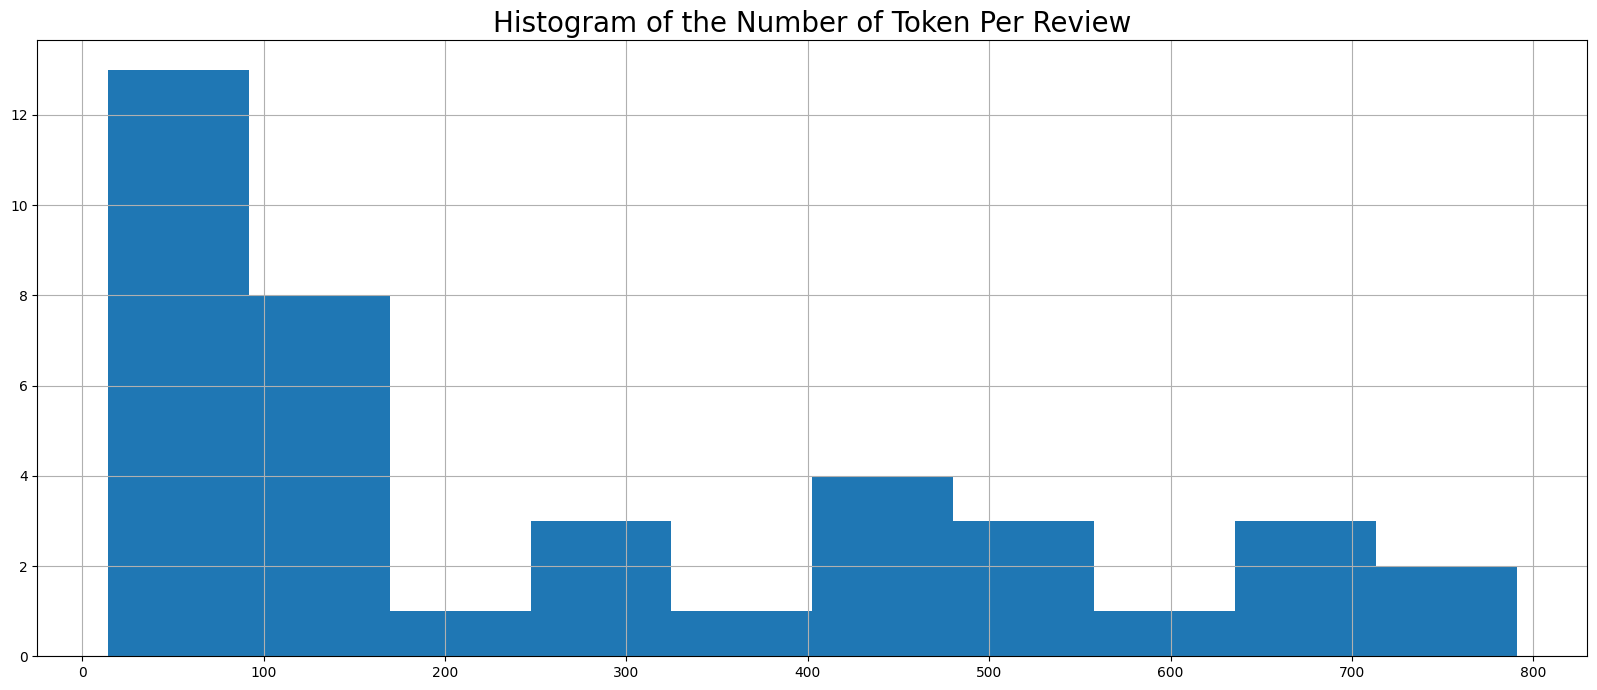

In [ ]:
# This function draw a histogram for the length of reviews based on the number of tokens per review

def tokenPerReviewHistogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
    plt.title('Histogram of the Number of Token Per Review', fontsize = 20)
    plt.gcf().set_size_inches((20, 8))
    plt.show()

tokenPerReviewHistogram(data['Feed'])



> ### 3) Number of Characters per Token

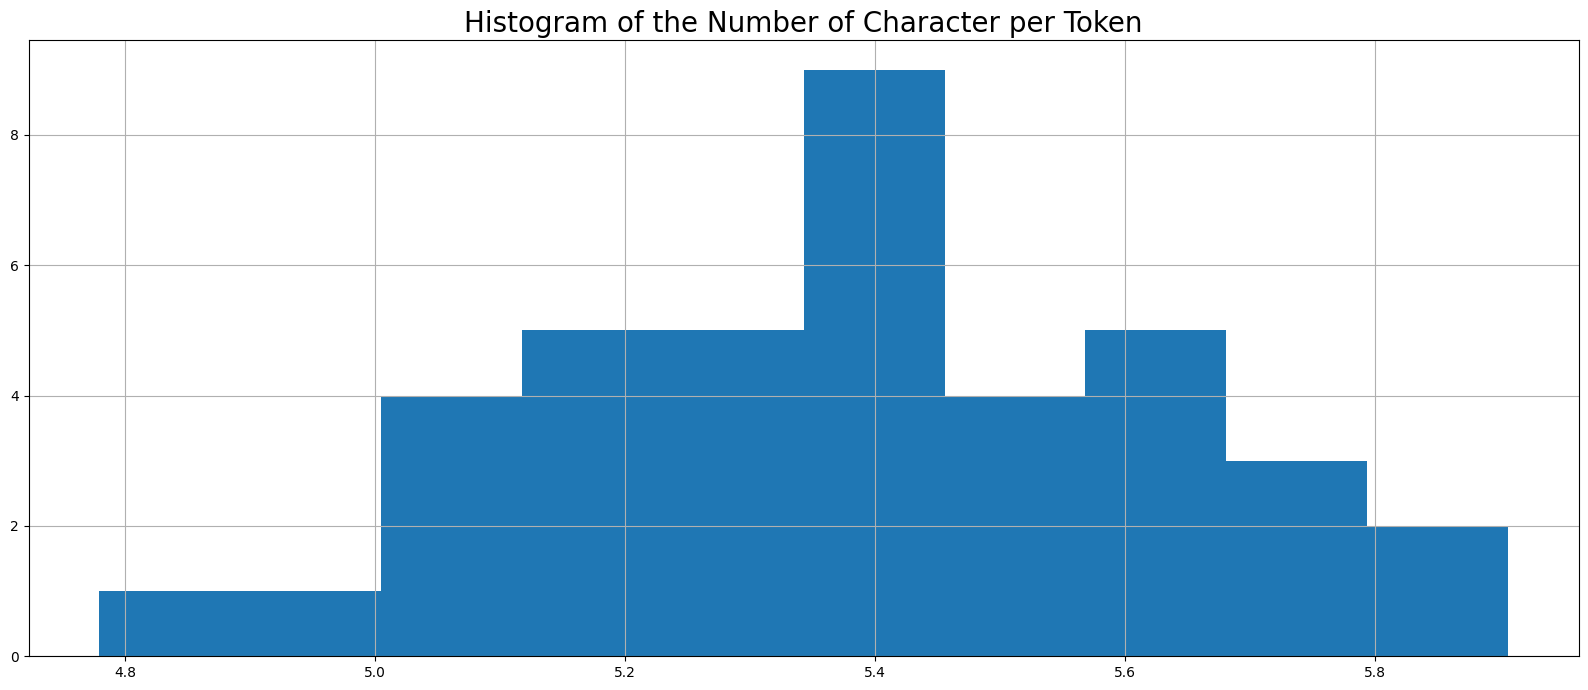

In [ ]:
# This function creates a histogram based on the number of characters per token

def characterPerTokenHistogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()
    plt.title('Histogram of the Number of Character per Token', fontsize = 20)
    plt.gcf().set_size_inches((20, 8))
    plt.show()


characterPerTokenHistogram(data['Feed'])

> ### 4) Word Cloud Graph

Word cloud graph provides a visual representation of the text, which could be very helpful to highlight keywords and most important terms in the textual data.  


> #### **# Non-Customized**



downloading and unzipping arabic font: /usr/local/lib/python3.10/dist-packages/ar_wordcloud/fonts/NotoNaskhArabic-unhinted.zip .. 
downloading and unzipping arabic font: /usr/local/lib/python3.10/dist-packages/ar_wordcloud/fonts/NotoSansArabic-unhinted.zip .. 
downloading and unzipping arabic font: /usr/local/lib/python3.10/dist-packages/ar_wordcloud/fonts/NotoKufiArabic-unhinted.zip .. 


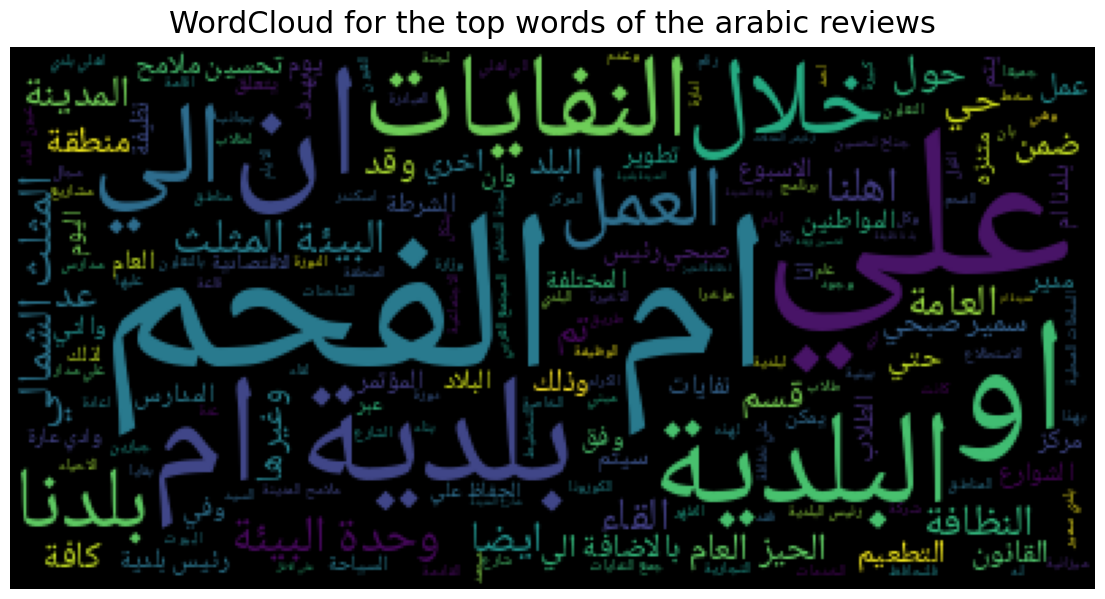

In [ ]:
from PIL import Image
from wordcloud import WordCloud
from ar_wordcloud import ArabicWordCloud
#awc = ArabicWordCloud(background_color="white")


wc = ArabicWordCloud(
    background_color='black',
    max_words=200,
)
wc.generate(' '.join(text for text in data['Feed']))
plt.figure(figsize=(14,8))
plt.title('WordCloud for the top words of the arabic reviews',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
#plt.gcf().set_size_inches((20, 8))
plt.imshow(wc)
plt.axis("off")
plt.show()

> #### **# Customized**

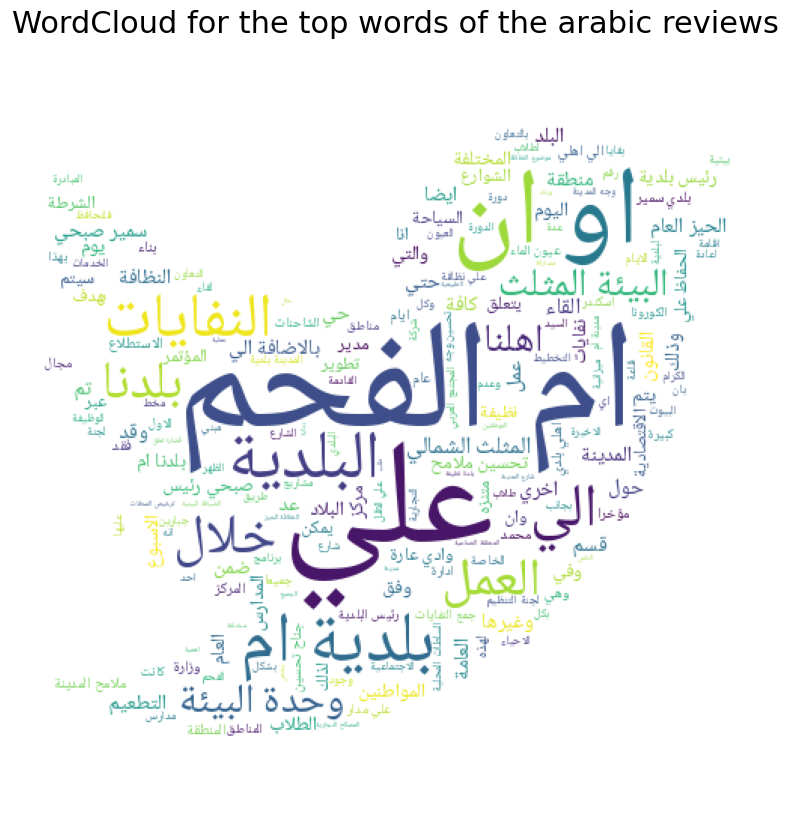

In [ ]:
from PIL import Image
from wordcloud import WordCloud
from ar_wordcloud import ArabicWordCloud
#awc = ArabicWordCloud(background_color="white")

twitter_mask = np.array(Image.open('/content/twitter_mask3.jpg'))

wc = ArabicWordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data['Feed']))
plt.figure(figsize=(20,10))
plt.title('WordCloud for the top words of the arabic reviews',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
#plt.gcf().set_size_inches((20, 8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
# The end for now.

# Web App using Gradio*

In [4]:
# Step 1: Install required libraries
!pip install gradio pandas matplotlib plotly pyarabic nltk wordcloud ar-wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00


In [10]:

# Step 2: Import the libraries
import string
import re
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel
from wordcloud import WordCloud
from ar_wordcloud import ArabicWordCloud
import plotly.graph_objs as go
import gradio as gr

# Step 3: Load and preprocess the dataset
def load_and_preprocess_data(file):
    try:
        data = pd.read_excel(file.name)  # Use file.name to access the file path
        data['تاريخ النشر'] = pd.to_datetime(data['تاريخ النشر'], format="%Y/%m/%d", errors='coerce')

        # Define punctuations and stop words
        punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!•”…“–ـ''' + string.punctuation
        stop_words = stopwords.words('arabic')

        arabic_diacritics = re.compile("""
                                     ّ    | # Shadda
                                     َ    | # Fatha
                                     ً    | # Tanwin Fath
                                     ُ    | # Damma
                                     ٌ    | # Tanwin Damm
                                     ِ    | # Kasra
                                     ٍ    | # Tanwin Kasr
                                     ْ    | # Sukun
                                     ـ     # Tatwil/Kashida
                                 """, re.VERBOSE)

        def preprocess(text):
            translator = str.maketrans('', '', punctuations)
            text = text.translate(translator)
            text = re.sub(arabic_diacritics, '', text)
            text = re.sub("[إأآا]", "ا", text)
            text = re.sub("ى", "ي", text)
            text = re.sub("گ", "ك", text)
            text = re.sub(r'(.)\1+', r'\1', text)
            text = removeNonArabic(text)
            text = ' '.join(word for word in text.split() if word not in stop_words)
            return text

        def removeNonArabic(text):
            list_text = tokenize(text, conditions=is_arabicrange, morphs=strip_tashkeel)
            return ' '.join(word for word in list_text)

        data['Feed'] = data['المنشور'].apply(preprocess)
        return data
    except Exception as e:
        print(f"Error processing file: {e}")
        raise  # Re-raise the exception to stop the process

def create_corpus_df(review):
    corpus = []
    for x in review.str.split():
        for i in x:
            corpus.append(i)
    return corpus

# Step 4: Create visualizations
def create_visualizations(data):
    # Top tokens bar chart
    corpus_reviews = create_corpus_df(data["Feed"])
    dic = {word: corpus_reviews.count(word) for word in set(corpus_reviews)}
    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:20]
    freq_df = pd.DataFrame.from_records(top, columns=['token', 'count'])

    # Bar chart
    bar_fig = go.Figure(data=[go.Bar(x=freq_df['token'], y=freq_df['count'])])
    bar_fig.update_layout(title='Top 20 Tokens', xaxis_title='Tokens', yaxis_title='Counts')

    # Word Cloud
    wc = ArabicWordCloud(background_color='white', max_words=200)
    wc.generate(' '.join(text for text in data['Feed']))

    # Save the word cloud image
    wc_image_path = "wordcloud.png"
    wc.to_file(wc_image_path)

    # Save the bar chart as an image
    bar_fig.write_image("bar_chart.png")

    return "bar_chart.png", wc_image_path

# Step 5: Gradio Interface
def analyze_text(file):
    try:
        data = load_and_preprocess_data(file)
        bar_fig_path, wc_image_path = create_visualizations(data)
        return bar_fig_path, wc_image_path
    except Exception as e:
        return None, None, f"Error: {str(e)}"  # Return error message


# Step 6: Create Gradio Interface

iface = gr.Interface(
    fn=analyze_text,
    inputs=gr.File(label="Upload Excel File", type="file"),  # Ensure the input is a file
    outputs=[
        gr.Image(type="filepath", label="Bar Chart of Top Tokens"),
        gr.Image(type="filepath", label="Word Cloud"),
        gr.Textbox(label="Error Message", interactive=False)  # Add a textbox for error messages
    ],
    title="Arabic Text Analysis",
    description="Upload an Excel file containing Arabic text to analyze the most common tokens and generate visualizations. The output will include a bar chart of the top tokens and a word cloud."
)

# Step 7: Launch the Gradio app
iface.launch()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://91b8653419becae4b3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
